# Logistic Regression Using Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv(r"C:\Users\User\OneDrive\Documents\train.csv")

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

# Missing Data

<Axes: >

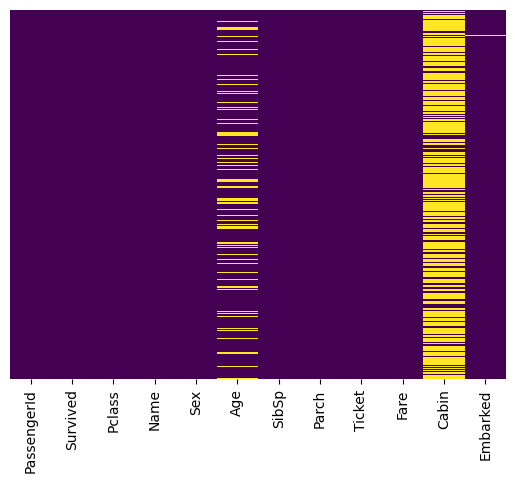

In [5]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\User\AppData\Local\Temp\ipykernel_13708\2488551282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived",data=dataset,palette='RdBu_r')


<Axes: xlabel='Survived', ylabel='count'>

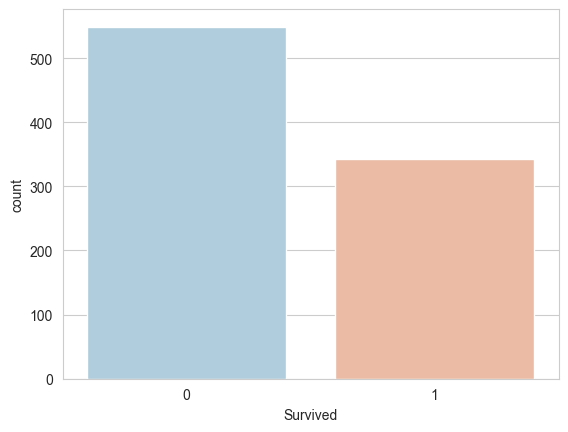

In [8]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=dataset,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

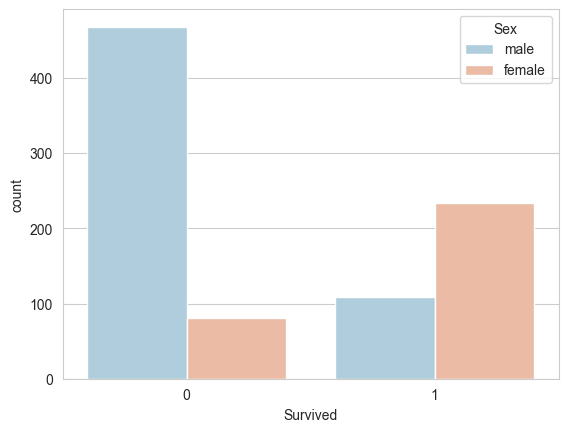

In [9]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=dataset,palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

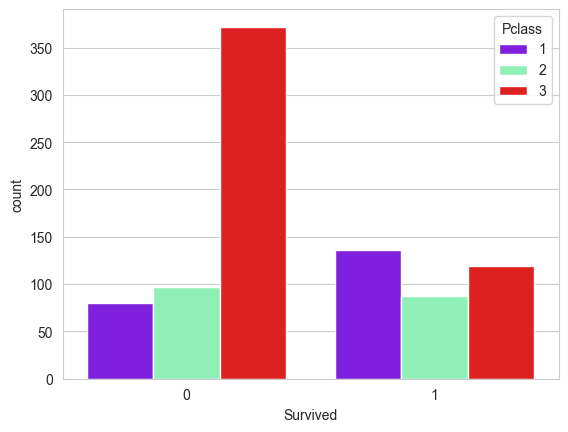

In [12]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=dataset,palette="rainbow")

C:\Users\User\AppData\Local\Temp\ipykernel_13708\3582083711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Age"].dropna(),kde=False,color='darkred',bins=30)


<Axes: xlabel='Age'>

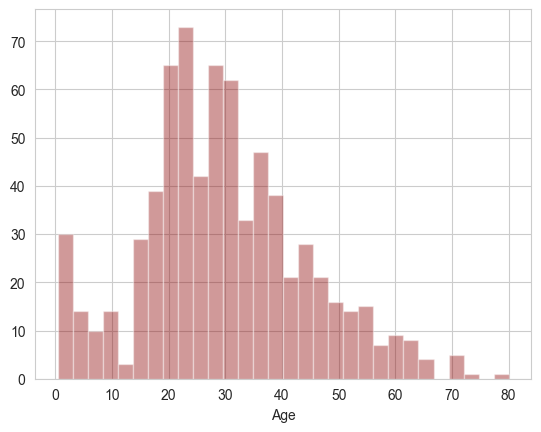

In [13]:
sns.distplot(dataset["Age"].dropna(),kde=False,color='darkred',bins=30)

<Axes: >

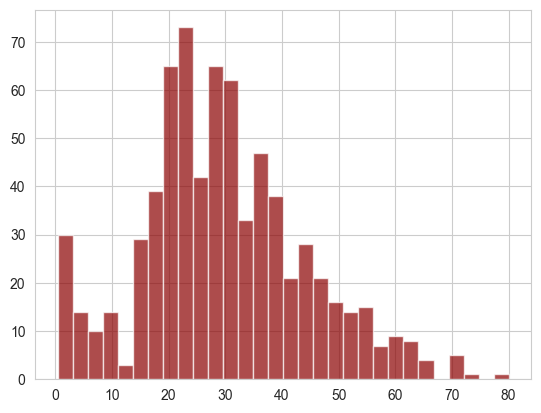

In [14]:
dataset["Age"].hist(bins=30,color="darkred",alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

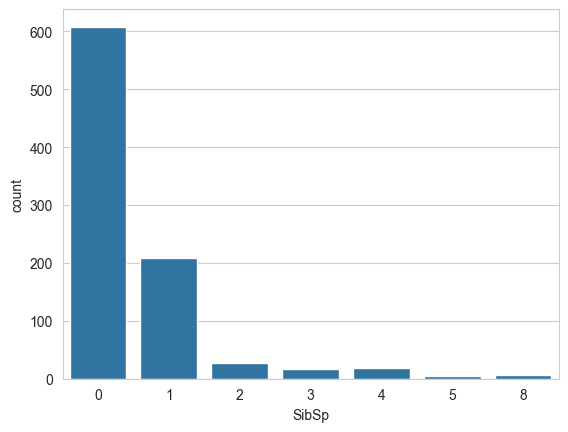

In [15]:
sns.countplot(x="SibSp",data=dataset)

<Axes: >

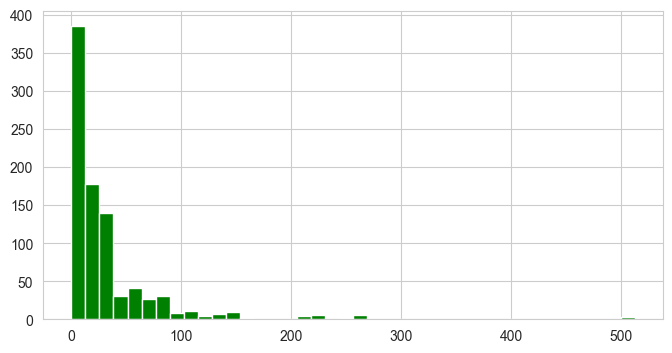

In [17]:
dataset["Fare"].hist(color="green",bins=40,figsize=(8,4))

# Cufflinks of Plots

In [19]:
!pip install cufflinks


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/914.9 kB ? eta -:--:--
   ---------------------------------------- 914.9/914.9 kB 12.9 MB/s  0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 12.8 MB/s  0:00:00
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68560 sha256=ca512abb0ef72e1f3900094cfe29bf00b474fb931ee0455bd9e8025c67d38735
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\13\bc\65\1ac45445dba1052b5e837dc49f5282c8cb2f934ae9e6f62f0e
Successfully built cufflinks

   ---------------- ----------------------- 2/5 [jupyterlab_wid


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import cufflinks as cf
cf.go_offline()

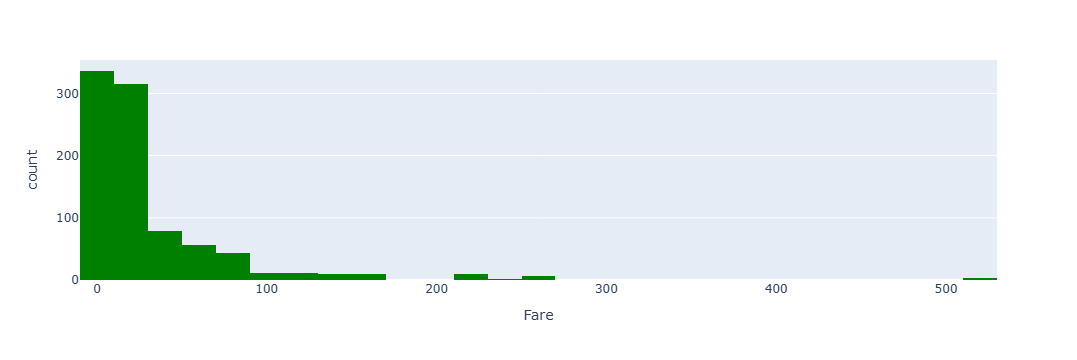

In [22]:
import plotly.express as px

fig = px.histogram(dataset, x="Fare", nbins=30, color_discrete_sequence=["green"])
fig.show()


# Data Cleaning

C:\Users\User\AppData\Local\Temp\ipykernel_13708\2720799800.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Pclass', ylabel='Age'>

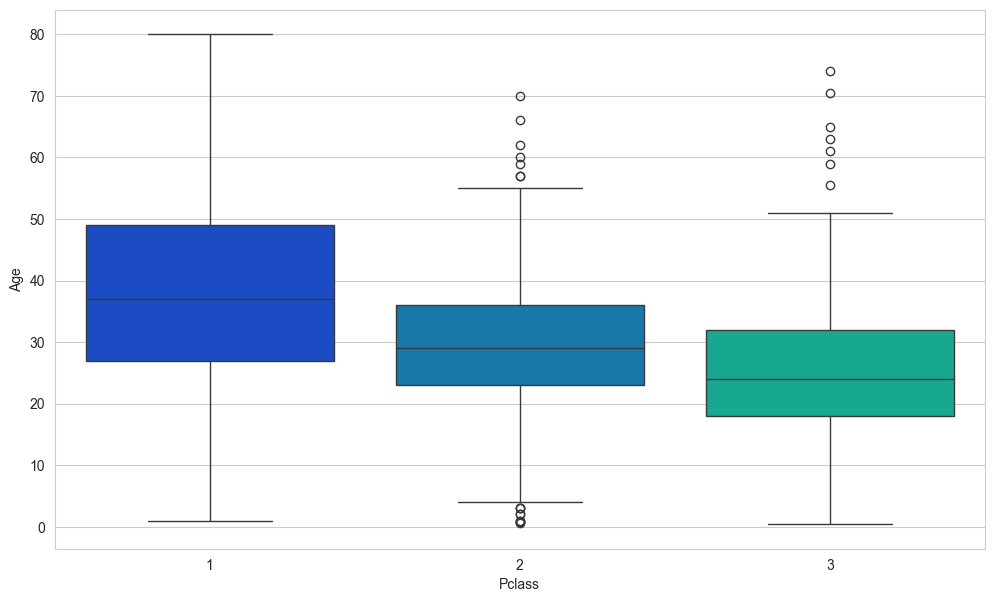

In [27]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="Pclass",y="Age",data=dataset,palette="winter")

In [28]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [31]:
dataset["Age"] = dataset[["Age","Pclass"]].apply(impute_age,axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_13708\822839471.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\User\AppData\Local\Temp\ipykernel_13708\822839471.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

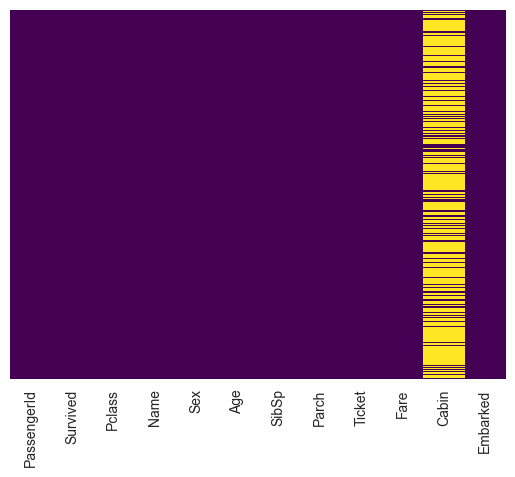

In [33]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [35]:
dataset.drop("Cabin",axis=1,inplace=True)

In [36]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
dataset.dropna(inplace=True)

# Converting Categorial Figures

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [40]:
sex = pd.get_dummies(dataset["Sex"],drop_first=True)
embark = pd.get_dummies(dataset["Embarked"],drop_first=True)

In [42]:
dataset.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [44]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [45]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


# Building Logistic Regression Model

# TRAIN, TEST , SPLIT

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop("Survived",axis=1), 
                                                    dataset["Survived"], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [48]:
from sklearn.linear_model import LogisticRegression